In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

 

In [23]:
data = pd.DataFrame(
    {
        "Alis": [
            500000,
            170000,
            240000,
            700000,
            420000,
            600000,
            330000,
            480000,
            510000,
            290000,
            610000,
            730000,
            360000,
            590000,
            450000,
            680000,
            720000,
            390000,
            440000,
            530000,
        ],
        "Sahe": [
            22,
            33,
            44,
            55,
            30,
            40,
            25,
            50,
            60,
            35,
            45,
            65,
            28,
            38,
            48,
            58,
            42,
            52,
            32,
            62,
        ],
        "Qiymet": [
            100000,
            200000,
            300000,
            120000,
            150000,
            250000,
            180000,
            310000,
            410000,
            190000,
            280000,
            390000,
            200000,
            260000,
            300000,
            340000,
            370000,
            240000,
            220000,
            360000,
        ],
    }
)
 

In [26]:
X = data[['Alis','Sahe']]
y = data['Qiymet']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
X_const = sm .add_constant(X)
model = sm.OLS(y,X_const).fit()


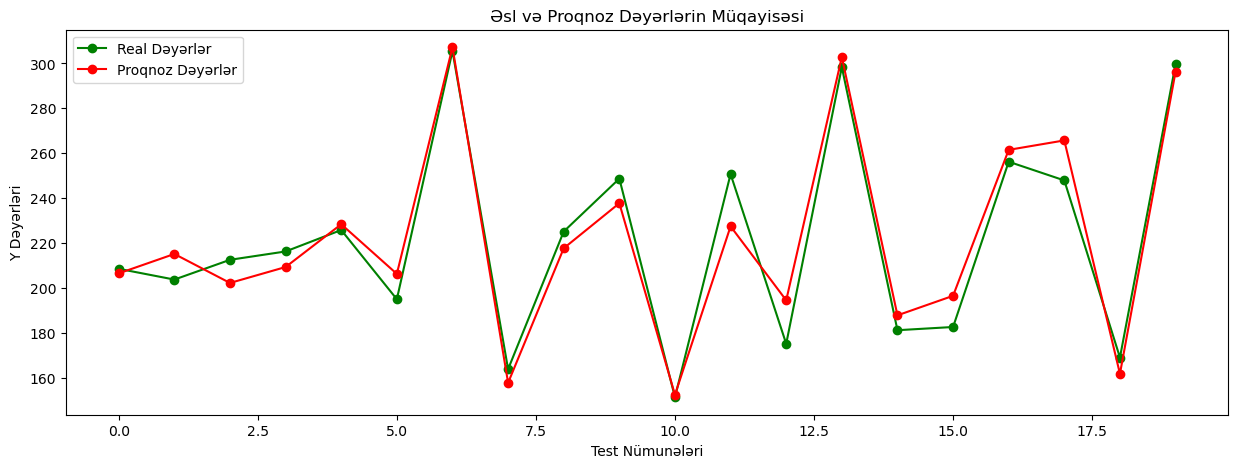

In [57]:
plt.figure(figsize=(15, 5))

# Əsl dəyərlər (y_test)
plt.plot(range(len(y_test)), y_test, label="Real Dəyərlər", marker="o", color="g")

# Proqnoz dəyərlər (y_pred)
plt.plot(range(len(y_pred)), y_pred, label="Proqnoz Dəyərlər", marker="o", color="r")

# Etiketlər və başlıq
plt.legend()
plt.xlabel("Test Nümunələri")
plt.ylabel("Y Dəyərləri")
plt.title("Əsl və Proqnoz Dəyərlərin Müqayisəsi")

# Qrafiki göstərmək
plt.show()

In [40]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE = {mse:.2f} | R2 = {r2:.2f}")

MSE = 2393087675.46 | R2 = 0.68


In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Qiymet   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9.679
Date:                Tue, 03 Dec 2024   Prob (F-statistic):            0.00156
Time:                        12:42:46   Log-Likelihood:                -248.28
No. Observations:                  20   AIC:                             502.6
Df Residuals:                      17   BIC:                             505.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.002e+04   5.64e+04      0.710      0.4

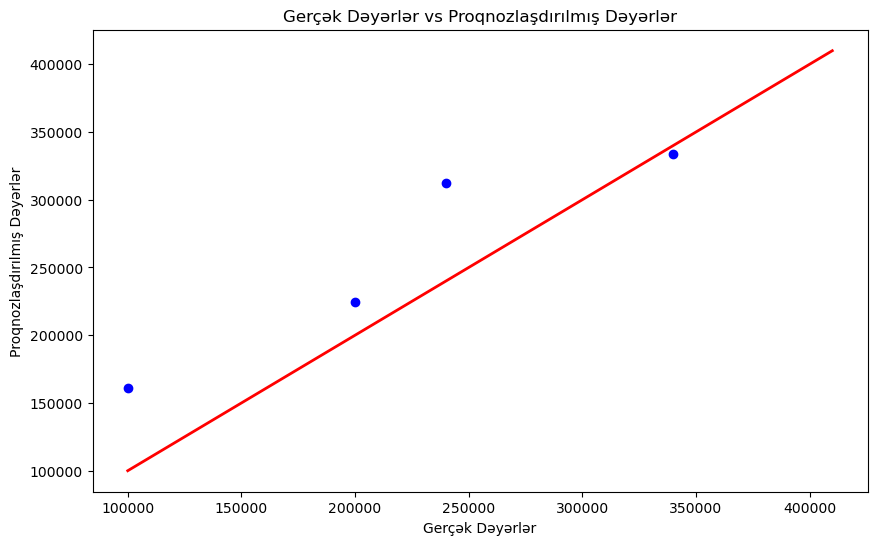

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")  # Gerçək vs Proqnozlaşdırılmış qiymətlər
plt.xlabel("Gerçək Dəyərlər")
plt.ylabel("Proqnozlaşdırılmış Dəyərlər")
plt.plot(
    [y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2
)  # Diagonal xətt
plt.title("Gerçək Dəyərlər vs Proqnozlaşdırılmış Dəyərlər")
plt.show()